In [2]:
import pandas as pd


In [ ]:
from zipfile import ZipFile
archive= "data/Archiv.zip"
with ZipFile(archive, "r") as zip:
    zip.extractall("data/")

In [3]:
df = pd.read_stata("data/hs_product.dta")
df

,product_id,hs_product_code,hs_product_name_short_en,level,parent_id
0,0,0,Textiles,section,NaN
1,1,1,Agriculture,section,NaN
2,2,2,Stone,section,NaN
3,3,3,Minerals,section,NaN
4,4,4,Metals,section,NaN
...,...,...,...,...,...
6401,11000,unspecified,Unspecified,6digit,4000.0
6402,11001,travel,Travel and tourism,6digit,4001.0
6403,11002,transport,Transport,6digit,4002.0
6404,11003,ict,ICT,6digit,4003.0


In [5]:
df.level.value_counts()

6digit     5045
4digit     1248
2digit      102
section      11
Name: level, dtype: int64

In [6]:
df[df.level=="section"]

,product_id,hs_product_code,hs_product_name_short_en,level,parent_id
0,0,0,Textiles,section,NaN
1,1,1,Agriculture,section,NaN
2,2,2,Stone,section,NaN
3,3,3,Minerals,section,NaN
4,4,4,Metals,section,NaN
5,5,5,Chemicals,section,NaN
6,6,6,Vehicles,section,NaN
7,7,7,Machinery,section,NaN
8,8,8,Electronics,section,NaN
9,9,9,Other,section,NaN


Used for import-export trade all over the world. “The HS comprises approximately 5,300 article/product descriptions that appear as headings and subheadings, arranged in 99 chapters, grouped in 21 sections. The six digits can be broken down into three parts.”

In [7]:
df.info() #product code are strings.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 0 to 6405
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                6406 non-null   int32  
 1   hs_product_code           6406 non-null   object 
 2   hs_product_name_short_en  6406 non-null   object 
 3   level                     6406 non-null   object 
 4   parent_id                 6395 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 275.3+ KB


In [8]:
right_level = df[df.level=="4digit"]# for ressources!

In [9]:
right_level[right_level.hs_product_code.str.startswith("27")]

# maps hs product code( with all its levels) to product id!

,product_id,hs_product_code,hs_product_name_short_en,level,parent_id
365,902,2701,Coal,4digit,126.0
366,903,2702,Lignite,4digit,126.0
367,904,2703,Peat,4digit,126.0
368,905,2704,Coke,4digit,126.0
369,906,2705,Non-petroleum gases,4digit,126.0
370,907,2706,"Tar distilled from coal, lignite etc.",4digit,126.0
371,908,2707,Oils etc. from high temperature coal tar,4digit,126.0
372,909,2708,Pitch and pitch coke,4digit,126.0
373,910,2709,"Petroleum oils, crude",4digit,126.0
374,911,2710,"Petroleum oils, refined",4digit,126.0


In [4]:
#4 digits:
# a lot of additional columns here- what do they mean?
fourdigits = pd.read_csv("data/country_hsproduct4digit_year.csv")
fourdigits

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,location_id,product_id,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,normalized_cog,normalized_pci,export_rpop,is_new,hs_eci,hs_coi,pci,location_code,hs_product_code
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,-0.212899,0.028159,0.0,False,-0.468199,-0.696722,0.036665,ABW,101
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,-0.355658,-0.052312,0.0,False,-0.663174,-0.704138,-0.047203,ABW,101
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,-0.140779,0.026342,0.0,False,-1.164518,-0.818232,0.034398,ABW,101
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,-0.092140,0.072612,0.0,False,0.194971,-0.708240,0.078009,ABW,101
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,-0.210998,-0.056592,0.0,False,-0.081546,-0.799462,-0.048809,ABW,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,-0.475659,0.138920,NaN,False,1.108447,-0.083574,0.133042,BLM,9999
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,-0.611337,-0.035477,NaN,False,0.539181,-0.405707,-0.027952,BLM,9999
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,NaN,NaN,NaN,False,0.736824,-0.273973,0.015785,BLM,9999
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,-0.894687,-1.166452,NaN,False,0.613699,-0.257085,-1.170523,BLM,9999


In [11]:
fourdigits[fourdigits.hs_product_code==2701] #i.e. for coal!

,location_id,product_id,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,normalized_cog,normalized_pci,export_rpop,is_new,hs_eci,hs_coi,pci,location_code,hs_product_code
1492829,0,902,1995,0,1541658,0.000000,NaN,-0.000221,0.986554,1.627919,-0.853445,-0.523659,0.0,False,-0.468199,-0.696722,-0.515285,ABW,2701
1492830,0,902,1996,2055014,88458,0.679037,NaN,0.000137,0.993753,0.715403,-0.663526,-0.558978,0.0,False,-0.663174,-0.704138,-0.553660,ABW,2701
1492831,0,902,1997,0,0,0.000000,NaN,0.000541,0.991185,0.922632,-0.581122,-0.516567,0.0,False,-1.164518,-0.818232,-0.507201,ABW,2701
1492832,0,902,1998,0,0,0.000000,NaN,0.000286,0.987585,0.797190,-0.630275,-0.583398,0.0,False,0.194971,-0.708240,-0.579015,ABW,2701
1492833,0,902,1999,0,0,0.000000,NaN,0.000630,0.985392,0.776858,-0.569508,-0.622405,0.0,False,-0.081546,-0.799462,-0.614875,ABW,2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498786,27,902,2016,0,0,0.000000,NaN,-0.001084,0.954403,-1.687528,-1.322755,-1.509993,NaN,False,1.108447,-0.083574,-1.536522,BLM,2701
1498787,27,902,2017,0,0,0.000000,NaN,-0.000439,0.951279,0.335633,-1.020758,-1.298945,NaN,False,0.539181,-0.405707,-1.302123,BLM,2701
1498788,27,902,2018,0,0,0.000000,NaN,-0.000545,0.954387,-1.321650,-1.147318,-1.452119,NaN,False,0.736824,-0.273973,-1.465457,BLM,2701
1498789,27,902,2019,0,0,0.000000,NaN,-0.000369,0.953363,-1.361944,-1.087394,-1.423035,NaN,False,0.613699,-0.257085,-1.429646,BLM,2701


export rca: revealed comparative advantage
coi - complexity outlook index
eci- economic complexity index (should be the same for all values of each country)

Product complexity index (pci): "Ranks the diversity and sophistication of production know-how required to produce a product" based on the other number of countries producing that product and their economic complexity.

Revealed comparative advantage (rca): Whether a country is an 'effective' exporter of a product (i.e. exports more than its 'fair share`). The bigger the value, the more important exporter the country is.

Per capita export intensity (rpop): An alternative measure of export intensity. The ratio of exports per capita of a country-product over the exports per capita of that product in the world.

-> from https://github.com/Ztirf91/aec/blob/main/README.md



In [12]:
fourdigits.hs_product_code.nunique()

1249

In [17]:
# now , i know sth about the data. Its time to filter out relevant data ( fossil fuel trade !!)
#hs product code -> product id s -> import exports for each country

right_level[right_level.hs_product_code.str.startswith("27")]

,product_id,hs_product_code,hs_product_name_short_en,level,parent_id
365,902,2701,Coal,4digit,126.0
366,903,2702,Lignite,4digit,126.0
367,904,2703,Peat,4digit,126.0
368,905,2704,Coke,4digit,126.0
369,906,2705,Non-petroleum gases,4digit,126.0
370,907,2706,"Tar distilled from coal, lignite etc.",4digit,126.0
371,908,2707,Oils etc. from high temperature coal tar,4digit,126.0
372,909,2708,Pitch and pitch coke,4digit,126.0
373,910,2709,"Petroleum oils, crude",4digit,126.0
374,911,2710,"Petroleum oils, refined",4digit,126.0



as written here, page 24: https://unstats.un.org/unsd/energy/ires/IRES-web.pdf  

and here ( in german): https://www.zolltarifnummern.de/2022/27

steinkohle - 2701

braunkohle - 2702  -> i later recognized that lignite (Braunkohle) exported and imported is very small- therefore add it to category "Coal" with other refined products from both sorts of coal.

Produkte aus kohle (i.e. Koks) - 2704 ( included for now..)


erdöl u. zuberatungen, die es enthalten(i.e. benzin, kerosin): 2710
-> we must add crude oil, otherwise the saudis hardly export anything...

Rohöl - 2709 (crude)


erdgas (und andere kohlenwasserstoffe wie propan, butan) - 2711




we dont add:

(ölhaltige schiefer/sande: 2714-10) 
[torf - 2703 (weggelasssen...), teer 2706, 
pech- 2708, ... mineralwachse(ie paraffin) 2712]



In [18]:
#1. merge 4digit codes with location and product data (df)

fourdigits

,location_id,product_id,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,normalized_cog,normalized_pci,export_rpop,is_new,hs_eci,hs_coi,pci,location_code,hs_product_code
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,-0.212899,0.028159,0.0,False,-0.468199,-0.696722,0.036665,ABW,101
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,-0.355658,-0.052312,0.0,False,-0.663174,-0.704138,-0.047203,ABW,101
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,-0.140779,0.026342,0.0,False,-1.164518,-0.818232,0.034398,ABW,101
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,-0.092140,0.072612,0.0,False,0.194971,-0.708240,0.078009,ABW,101
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,-0.210998,-0.056592,0.0,False,-0.081546,-0.799462,-0.048809,ABW,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,-0.475659,0.138920,NaN,False,1.108447,-0.083574,0.133042,BLM,9999
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,-0.611337,-0.035477,NaN,False,0.539181,-0.405707,-0.027952,BLM,9999
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,NaN,NaN,NaN,False,0.736824,-0.273973,0.015785,BLM,9999
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,-0.894687,-1.166452,NaN,False,0.613699,-0.257085,-1.170523,BLM,9999


In [19]:
fourdigits.product_id.nunique() ,fourdigits.hs_product_code.nunique()

(1248, 1249)

In [20]:
needed_cols = ['product_id','hs_product_name_short_en','parent_id']
tomergewith = df[needed_cols]
tomergewith

,product_id,hs_product_name_short_en,parent_id
0,0,Textiles,NaN
1,1,Agriculture,NaN
2,2,Stone,NaN
3,3,Minerals,NaN
4,4,Metals,NaN
...,...,...,...
6401,11000,Unspecified,4000.0
6402,11001,Travel and tourism,4001.0
6403,11002,Transport,4002.0
6404,11003,ICT,4003.0


In [21]:
merged = fourdigits.merge(tomergewith, how="left", on= "product_id")
merged

,location_id,product_id,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,normalized_pci,export_rpop,is_new,hs_eci,hs_coi,pci,location_code,hs_product_code,hs_product_name_short_en,parent_id
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,0.028159,0.0,False,-0.468199,-0.696722,0.036665,ABW,101,Horses,100.0
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,-0.052312,0.0,False,-0.663174,-0.704138,-0.047203,ABW,101,Horses,100.0
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,0.026342,0.0,False,-1.164518,-0.818232,0.034398,ABW,101,Horses,100.0
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,0.072612,0.0,False,0.194971,-0.708240,0.078009,ABW,101,Horses,100.0
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,-0.056592,0.0,False,-0.081546,-0.799462,-0.048809,ABW,101,Horses,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,...,0.138920,NaN,False,1.108447,-0.083574,0.133042,BLM,9999,Commodities not specified according to kind,196.0
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,...,-0.035477,NaN,False,0.539181,-0.405707,-0.027952,BLM,9999,Commodities not specified according to kind,196.0
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,...,NaN,NaN,False,0.736824,-0.273973,0.015785,BLM,9999,Commodities not specified according to kind,196.0
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,...,-1.166452,NaN,False,0.613699,-0.257085,-1.170523,BLM,9999,Commodities not specified according to kind,196.0


In [22]:
needed_cols = ['product_id','hs_product_name_short_en','parent_id']
tomergewith2 = df[needed_cols]
tomergewith2 = tomergewith2.rename(columns= {'hs_product_name_short_en':'parent', 'parent_id':'grandparent_id'})
tomergewith2

,product_id,parent,grandparent_id
0,0,Textiles,NaN
1,1,Agriculture,NaN
2,2,Stone,NaN
3,3,Minerals,NaN
4,4,Metals,NaN
...,...,...,...
6401,11000,Unspecified,4000.0
6402,11001,Travel and tourism,4001.0
6403,11002,Transport,4002.0
6404,11003,ICT,4003.0


In [23]:
merged2= merged.merge(tomergewith2,how="left", left_on="parent_id",right_on="product_id")

In [24]:
merged2 # here, i also wanted to add the parent id + name

,location_id,product_id_x,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,hs_eci,hs_coi,pci,location_code,hs_product_code,hs_product_name_short_en,parent_id,product_id_y,parent,grandparent_id
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,-0.468199,-0.696722,0.036665,ABW,101,Horses,100.0,100,Live animals,1.0
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,-0.663174,-0.704138,-0.047203,ABW,101,Horses,100.0,100,Live animals,1.0
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,-1.164518,-0.818232,0.034398,ABW,101,Horses,100.0,100,Live animals,1.0
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,0.194971,-0.708240,0.078009,ABW,101,Horses,100.0,100,Live animals,1.0
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,-0.081546,-0.799462,-0.048809,ABW,101,Horses,100.0,100,Live animals,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,...,1.108447,-0.083574,0.133042,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,...,0.539181,-0.405707,-0.027952,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,...,0.736824,-0.273973,0.015785,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,...,0.613699,-0.257085,-1.170523,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0


In [25]:
needed_cols = ['product_id','hs_product_name_short_en']
tomergewith3 = df[needed_cols]
tomergewith3 = tomergewith3.rename(columns= {'hs_product_name_short_en':'grandparent'})
tomergewith3 # now the grandparent...

,product_id,grandparent
0,0,Textiles
1,1,Agriculture
2,2,Stone
3,3,Minerals
4,4,Metals
...,...,...
6401,11000,Unspecified
6402,11001,Travel and tourism
6403,11002,Transport
6404,11003,ICT


In [26]:
merged_3 = merged2.merge(tomergewith3, how="left",left_on="grandparent_id",right_on="product_id")

In [27]:
merged_3

,location_id,product_id_x,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,pci,location_code,hs_product_code,hs_product_name_short_en,parent_id,product_id_y,parent,grandparent_id,product_id,grandparent
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,0.036665,ABW,101,Horses,100.0,100,Live animals,1.0,1,Agriculture
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,-0.047203,ABW,101,Horses,100.0,100,Live animals,1.0,1,Agriculture
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,0.034398,ABW,101,Horses,100.0,100,Live animals,1.0,1,Agriculture
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,0.078009,ABW,101,Horses,100.0,100,Live animals,1.0,1,Agriculture
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,-0.048809,ABW,101,Horses,100.0,100,Live animals,1.0,1,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,...,0.133042,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,...,-0.027952,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,...,0.015785,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,...,-1.170523,BLM,9999,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other


In [28]:
merged_3.location_id.nunique()

243

In [29]:
merged_3.info() #location code are both objects... but maybe 2 have the same? 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7404387 entries, 0 to 7404386
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   location_id               int64  
 1   product_id_x              int64  
 2   year                      int64  
 3   export_value              int64  
 4   import_value              int64  
 5   export_rca                float64
 6   product_status            object 
 7   cog                       float64
 8   distance                  float64
 9   normalized_distance       float64
 10  normalized_cog            float64
 11  normalized_pci            float64
 12  export_rpop               float64
 13  is_new                    bool   
 14  hs_eci                    float64
 15  hs_coi                    float64
 16  pci                       float64
 17  location_code             object 
 18  hs_product_code           object 
 19  hs_product_name_short_en  object 
 20  parent_id               

In [5]:
location = pd.read_stata("data/location.dta")

In [31]:

location.head() # 7 regions(continents) + many countries 

,location_id,location_code,location_name_short_en,level,parent_id
0,0,ABW,Aruba,country,356.0
1,1,AFG,Afghanistan,country,353.0
2,2,AGO,Angola,country,352.0
3,3,AIA,Anguilla,country,356.0
4,4,ALB,Albania,country,355.0


In [32]:
for_merging = location.rename(columns={"location_name_short_en":"location_name", "level":"location_level","parent_id":"parent_location"})
for_merge = for_merging[["location_code","location_name","location_level","parent_location"]]
for_merge # now merge with location...


,location_code,location_name,location_level,parent_location
0,ABW,Aruba,country,356.0
1,AFG,Afghanistan,country,353.0
2,AGO,Angola,country,352.0
3,AIA,Anguilla,country,356.0
4,ALB,Albania,country,355.0
...,...,...,...,...
253,3,Oceania,region,NaN
254,4,Europe,region,NaN
255,5,North America,region,NaN
256,6,South America,region,NaN


In [33]:
final_merge = merged_3.merge(for_merge,how="left", on="location_code")
final_merge

,location_id,product_id_x,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,hs_product_name_short_en,parent_id,product_id_y,parent,grandparent_id,product_id,grandparent,location_name,location_level,parent_location
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356.0
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356.0
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356.0
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356.0
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356.0
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356.0
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356.0
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356.0


In [34]:
final_merge.location_level.value_counts()

country    7404387
Name: location_level, dtype: int64

In [35]:
for_merge.location_level.value_counts()

country    251
region       7
Name: location_level, dtype: int64

In [36]:
for_merge2 = location.rename(columns={"location_name_short_en":"region"})
for_merge2 = for_merge2[["location_id","region"]]
for_merge2 # also with big regions... (not really necessary)

,location_id,region
0,0,Aruba
1,1,Afghanistan
2,2,Angola
3,3,Anguilla
4,4,Albania
...,...,...
253,354,Oceania
254,355,Europe
255,356,North America
256,357,South America


In [37]:
final_merge.parent_location = final_merge.parent_location.astype(int)
for_merge2.location_id = for_merge2.location_id.astype(int)
final_merge # transform data so we can merge

,location_id,product_id_x,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,hs_product_name_short_en,parent_id,product_id_y,parent,grandparent_id,product_id,grandparent,location_name,location_level,parent_location
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,Horses,100.0,100,Live animals,1.0,1,Agriculture,Aruba,country,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404382,27,1891,2016,214449,713002,0.545997,NaN,0.000649,0.931090,1.461715,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356
7404383,27,1891,2017,457612,987222,0.595102,NaN,0.000356,0.941450,1.400384,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356
7404384,27,1891,2018,327454,1307902,1.452907,NaN,0.000000,0.921278,NaN,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356
7404385,27,1891,2019,253382,1112812,0.000000,NaN,0.000000,0.912232,2.411718,...,Commodities not specified according to kind,196.0,196,Other,9.0,9,Other,Saint Barthélemy,country,356


In [38]:
ultimate_merge= final_merge.merge(for_merge2, how="left", left_on="parent_location", right_on="location_id")
ultimate_merge.head()


,location_id_x,product_id_x,year,export_value,import_value,export_rca,product_status,cog,distance,normalized_distance,...,product_id_y,parent,grandparent_id,product_id,grandparent,location_name,location_level,parent_location,location_id_y,region
0,0,650,1995,18008,7200,0.133305,NaN,0.001366,0.987482,1.315366,...,100,Live animals,1.0,1,Agriculture,Aruba,country,356,356,North America
1,0,650,1996,0,4021,0.000000,NaN,0.000852,0.992846,1.156393,...,100,Live animals,1.0,1,Agriculture,Aruba,country,356,356,North America
2,0,650,1997,0,0,0.000000,NaN,0.001525,0.993449,0.075018,...,100,Live animals,1.0,1,Agriculture,Aruba,country,356,356,North America
3,0,650,1998,0,0,0.000000,NaN,0.001494,0.987446,0.848974,...,100,Live animals,1.0,1,Agriculture,Aruba,country,356,356,North America
4,0,650,1999,14473,46669,0.061615,NaN,0.001423,0.983023,1.422210,...,100,Live animals,1.0,1,Agriculture,Aruba,country,356,356,North America


In [39]:
# now delete superfluous columns... ( and put them in the right order!)

ultimate_merge.columns

Index(['location_id_x', 'product_id_x', 'year', 'export_value', 'import_value',
       'export_rca', 'product_status', 'cog', 'distance',
       'normalized_distance', 'normalized_cog', 'normalized_pci',
       'export_rpop', 'is_new', 'hs_eci', 'hs_coi', 'pci', 'location_code',
       'hs_product_code', 'hs_product_name_short_en', 'parent_id',
       'product_id_y', 'parent', 'grandparent_id', 'product_id', 'grandparent',
       'location_name', 'location_level', 'parent_location', 'location_id_y',
       'region'],
      dtype='object')

In [40]:
needed_cols=['location_id_x', 'product_id_x', 'year', 'export_value', 'import_value',
       'export_rca', 'product_status', 'cog', 'distance',
       'normalized_distance', 'normalized_cog', 'normalized_pci',
       'export_rpop', 'is_new', 'hs_eci', 'hs_coi', 'pci', 'location_code',
       'hs_product_code', 'hs_product_name_short_en', 'parent_id','parent', 'grandparent',
       'location_name', 'location_level',
       'region']

In [41]:
ultimate_merge = ultimate_merge[needed_cols] # reduced nr of colums to 27
um = ultimate_merge

In [42]:
# now, look for the specific products ( and maybe years )

* Coal = steinkohle - 2701 + braunkohle - 2702 + produkte aus kohle (i.e. Koks) - 2704
 
* Oil = rohöl: 2709 (crude) + erdöl u. zuberatungen, die es enthalten(i.e. benzin, kerosin): 2710

* Natural Gas: Erdgas (und andere kohlenwasserstoffe wie propan, butan) - 2711



leave out:

(ölhaltige schiefer/sande: 2714-10)
.....
[torf - 2703 (weggelasssen...), teer 2706, 
pech- 2708, ... mineralwachse(ie paraffin) 2712]



In [43]:
um.info() # hs_product codes are STRINGs!!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7404387 entries, 0 to 7404386
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   location_id_x             int64  
 1   product_id_x              int64  
 2   year                      int64  
 3   export_value              int64  
 4   import_value              int64  
 5   export_rca                float64
 6   product_status            object 
 7   cog                       float64
 8   distance                  float64
 9   normalized_distance       float64
 10  normalized_cog            float64
 11  normalized_pci            float64
 12  export_rpop               float64
 13  is_new                    bool   
 14  hs_eci                    float64
 15  hs_coi                    float64
 16  pci                       float64
 17  location_code             object 
 18  hs_product_code           object 
 19  hs_product_name_short_en  object 
 20  parent_id               

In [44]:
um.hs_product_code = um.hs_product_code.astype(str) # now they really are 

In [45]:
listofressources=["2701","2702","2704","2709","2710","2711"]

In [46]:
fossil_trade = um[um.hs_product_code.isin(listofressources)]

In [47]:
fossil_trade.hs_product_name_short_en.value_counts()
# might be changed later...

Coal                       5962
Lignite                    5962
Coke                       5962
Petroleum oils, crude      5962
Petroleum oils, refined    5962
Petroleum gases            5962
Name: hs_product_name_short_en, dtype: int64

In [48]:
fossil_trade.hs_product_name_short_en = fossil_trade.hs_product_name_short_en.map({"Coal":"Coal","Lignite":"Coal","Coke":"Coal","Petroleum oils, crude":"Petroleum oils, crude and refined","Petroleum oils, refined":"Petroleum oils, crude and refined","Petroleum gases":"Petroleum gases"})

fossil_trade.hs_product_name_short_en.value_counts()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Coal                                 17886
Petroleum oils, crude and refined    11924
Petroleum gases                       5962
Name: hs_product_name_short_en, dtype: int64

In [49]:
fossil_trade.to_csv("updated_fossil_trade_data.csv", index=False)

In [50]:
# it works !!! .. may maybe only use crude oil / raw coal...


# now go for the green products! we have to use sex digit hs codes for that.



In [4]:
sixdigit = pd.read_csv("data/country_hsproduct6digit_year.csv")

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
sixdigit.head()


,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,hs_product_code
0,0,5000,1995,18008.0,7200.0,-0.468199,-0.696722,ABW,10111
1,0,5000,1996,0.0,3020.0,-0.663174,-0.704138,ABW,10111
2,0,5000,1997,NaN,NaN,-1.164518,-0.818232,ABW,10111
3,0,5000,1998,NaN,NaN,0.194971,-0.708240,ABW,10111
4,0,5000,1999,14473.0,46669.0,-0.081546,-0.799462,ABW,10111


In [53]:
hs6= sixdigit.drop(columns="hs_product_code",axis=1)
#this doesnt seem reliable, we rather use that from the product table.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6406 entries, 0 to 6405
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_id                6406 non-null   int32  
 1   hs_product_code           6406 non-null   object 
 2   hs_product_name_short_en  6406 non-null   object 
 3   level                     6406 non-null   object 
 4   parent_id                 6395 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 275.3+ KB


In [55]:
hs_6 = hs6.merge(df, how="left",on="product_id")
hs_6

,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,hs_product_code,hs_product_name_short_en,level,parent_id
0,0,5000,1995,18008.0,7200.0,-0.468199,-0.696722,ABW,010111,"Horses, pure-bred",6digit,650.0
1,0,5000,1996,0.0,3020.0,-0.663174,-0.704138,ABW,010111,"Horses, pure-bred",6digit,650.0
2,0,5000,1997,NaN,NaN,-1.164518,-0.818232,ABW,010111,"Horses, pure-bred",6digit,650.0
3,0,5000,1998,NaN,NaN,0.194971,-0.708240,ABW,010111,"Horses, pure-bred",6digit,650.0
4,0,5000,1999,14473.0,46669.0,-0.081546,-0.799462,ABW,010111,"Horses, pure-bred",6digit,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32916660,248,11000,2015,0.0,0.0,-0.815783,-0.913629,ZWE,unspecified,Unspecified,6digit,4000.0
32916661,248,11000,2016,0.0,0.0,-1.084832,-1.000412,ZWE,unspecified,Unspecified,6digit,4000.0
32916662,248,11000,2017,0.0,0.0,-1.101695,-1.081546,ZWE,unspecified,Unspecified,6digit,4000.0
32916663,248,11000,2018,0.0,0.0,-1.186617,-1.056068,ZWE,unspecified,Unspecified,6digit,4000.0


In [56]:
hs_6.level.value_counts()

6digit    32916665
Name: level, dtype: int64

In [57]:
import numpy as np # to replace nan export/import values with 0,0, so you can turn float into int
#and then use the dataset in tableau

<AxesSubplot:xlabel='location_name_short_en'>

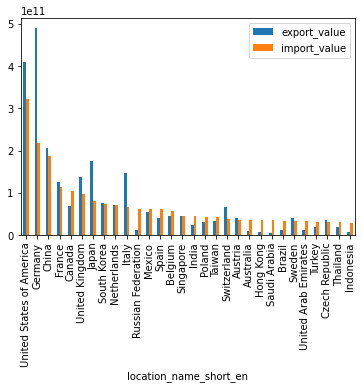

In [ ]:
core_CLEG[["export_value","import_value","hs_product_name_short_en","location_name_short_en"]].groupby("location_name_short_en").sum("import_value").sort_values(by="import_value",ascending=False).head(30).plot(kind="bar")

In [59]:
hs_6#above= Testing for Cleg + Goods clasification 


,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,hs_product_code,hs_product_name_short_en,level,parent_id
0,0,5000,1995,18008.0,7200.0,-0.468199,-0.696722,ABW,010111,"Horses, pure-bred",6digit,650.0
1,0,5000,1996,0.0,3020.0,-0.663174,-0.704138,ABW,010111,"Horses, pure-bred",6digit,650.0
2,0,5000,1997,NaN,NaN,-1.164518,-0.818232,ABW,010111,"Horses, pure-bred",6digit,650.0
3,0,5000,1998,NaN,NaN,0.194971,-0.708240,ABW,010111,"Horses, pure-bred",6digit,650.0
4,0,5000,1999,14473.0,46669.0,-0.081546,-0.799462,ABW,010111,"Horses, pure-bred",6digit,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32916660,248,11000,2015,0.0,0.0,-0.815783,-0.913629,ZWE,unspecified,Unspecified,6digit,4000.0
32916661,248,11000,2016,0.0,0.0,-1.084832,-1.000412,ZWE,unspecified,Unspecified,6digit,4000.0
32916662,248,11000,2017,0.0,0.0,-1.101695,-1.081546,ZWE,unspecified,Unspecified,6digit,4000.0
32916663,248,11000,2018,0.0,0.0,-1.186617,-1.056068,ZWE,unspecified,Unspecified,6digit,4000.0


In [60]:
ugga = hs_6[hs_6.hs_product_code =="850230"].groupby("location_id").sum("export_value").sort_values(ascending= False,by="export_value")
# 870390 -> Evs bzw: 

KeyboardInterrupt: 

In [ ]:
location.location_id = location.location_id.astype(int)

In [ ]:
p = ugga.merge(location, how="left",on="location_id")

In [ ]:
p.head(20)# test for windcraft...

,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,parent_id_x,location_code,location_name_short_en,level,parent_id_y
0,64,241124,52195,3.732544e+10,1.516778e+09,31.416441,33.090920,44330.0,DNK,Denmark,country,355.0
1,61,241124,52195,3.495241e+10,1.323697e+10,56.262254,-67.160384,44330.0,DEU,Germany,country,355.0
2,231,241124,52195,2.539593e+10,1.964638e+10,44.162709,4.085228,44330.0,USA,United States of America,country,356.0
3,71,241124,52195,1.433166e+10,2.412077e+09,23.960352,58.750455,44330.0,ESP,Spain,country,355.0
4,114,241124,52195,9.715103e+09,2.688294e+09,63.996474,1.454489,44330.0,JPN,Japan,country,353.0
5,43,241124,52195,9.303794e+09,4.029658e+09,20.926143,58.712502,44330.0,CHN,China,country,353.0
6,208,241124,52195,6.153094e+09,3.235119e+09,50.462063,17.920062,44330.0,SWE,Sweden,country,355.0
7,41,241124,52195,3.529121e+09,2.888154e+08,56.329031,16.734245,44330.0,CHE,Switzerland,country,355.0
8,102,241124,52195,3.238989e+09,5.111505e+08,32.777820,26.608914,44330.0,HUN,Hungary,country,355.0
9,162,241124,52195,2.976618e+09,5.045351e+09,31.037733,39.612561,44330.0,NLD,Netherlands,country,355.0


In [6]:
# try with another list... now a bigger one! 
full_list = pd.read_csv("data/env_products_complete_list.csv",skiprows=11)

In [7]:
full_list #256 entries. not all of them "fully environmental"

,HS CODE,MEDIUM
0,380210,WAT
1,390940,HEM
2,392010,WM
3,392030,HEM
4,392111,HEM
...,...,...
251,850440,REP
252,381800,REP
253,841280,REP
254,850300,REP


In [63]:
full_list["HS CODE"] = full_list["HS CODE"].astype(str)

In [ ]:
full_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   HS CODE  256 non-null    object
 1   MEDIUM   256 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [64]:
full_list[full_list["HS CODE"].duplicated()]

,HS CODE,MEDIUM
251,850440,REP
253,841280,REP
254,850300,REP


In [65]:
full_list[full_list["HS CODE"]=="854140"]
#  noch nciht neu gespeichert), sonsonten alle in REP....

,HS CODE,MEDIUM
159,854140,REP


In [9]:
#fixed list( remove duplicates in python, but change medium to REP) new import...
fixed_full_list = pd.read_csv("data/env_products_complete_list.csv",skiprows=11)
fixed_full_list[fixed_full_list.duplicated()]

,HS CODE,MEDIUM
251,850440,REP
253,841280,REP
254,850300,REP


In [67]:
fixed_full_list.drop_duplicates(inplace=True)
fixed_full_list["HS CODE"] = fixed_full_list["HS CODE"].astype(str)

In [68]:
fixed_full_list[fixed_full_list.duplicated()]#done!

,HS CODE,MEDIUM


In [69]:
full_env_prods = hs_6.merge(fixed_full_list, left_on="hs_product_code",right_on="HS CODE", how="inner")

In [438]:
full_env_prods["HS CODE"].isna().value_counts()
#rouughly 2/3 hs codes didnt match, when i used left joins earlier.

False    1527084
Name: HS CODE, dtype: int64

In [70]:
full_env_prods

,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,hs_product_code,hs_product_name_short_en,level,parent_id,HS CODE,MEDIUM
0,0,6575,1995,0.0,5870.0,-0.468199,-0.696722,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT
1,0,6575,1996,NaN,NaN,-0.663174,-0.704138,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT
2,0,6575,1997,NaN,NaN,-1.164518,-0.818232,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT
3,0,6575,1998,NaN,NaN,0.194971,-0.708240,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT
4,0,6575,1999,0.0,45511.0,-0.081546,-0.799462,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527079,250,9975,2016,167175.0,263297.0,0.773708,0.008538,ANS,950720,Fish-hooks,6digit,1865.0,950720,NRP
1527080,250,9975,2017,347567.0,234692.0,0.728651,-0.192272,ANS,950720,Fish-hooks,6digit,1865.0,950720,NRP
1527081,250,9975,2018,93319.0,152127.0,0.723664,-0.368834,ANS,950720,Fish-hooks,6digit,1865.0,950720,NRP
1527082,250,9975,2019,236964.0,156538.0,1.331310,0.253223,ANS,950720,Fish-hooks,6digit,1865.0,950720,NRP


In [440]:
full_env_prods[full_env_prods.MEDIUM=="REP"].hs_product_name_short_en.value_counts()

Chemical wafers for electronic                      6526
Electric transformers, 16-500KVA                    6526
AC generators, 75-375 kVA                           6526
AC generators, 375-750 kVA                          6526
AC generators, >750kVA                              6526
Electric generating sets, nes                       6526
Parts for electric motors & generators              6526
Liquid dielectric transformers <650KVA              6526
Liquid dielectric transformers 650-10,000KVA        6526
Liquid dielectric transformers >10,000KVA           6526
Electric transformers, <1KVA                        6526
Electric transformers, 1-16 KVA                     6526
Electric transformers, >500KVA                      6526
Plastic tanks, <300 L                               6526
Static converters, nes                              6526
Parts of electrical transformers & inductors        6526
Lead-acid electric accumulators, non-vehicle        6526
Electrical control & distributi

In [ ]:
# what do all these shortcuts mean?

APC = Air pollution control; CRE = Cleaner or more resource efficient technologies and products; EPP = Environmentally preferable products based on end use or disposal characteristics; HEM = Heat and energy management; MON = Environmental monitoring, analysis and assessment equipment; NRP = Natural resources protection; NVA = Noise and vibration abatement; REP = Renewable energy plant; SWM = Management of solid and hazardous waste and recycling systems; SWR = Clean up or remediation of soil and water; WAT = Waste water management and potable water treatment.

In [71]:
# now turn exports and imports to integers, so it will work in tableau!

full_env_prods.export_value = full_env_prods.export_value.astype(float).replace(np.nan,0.0)
full_env_prods.import_value = full_env_prods.import_value.astype(float).replace(np.nan,0.0)
full_env_prods.export_value = full_env_prods.export_value.astype(int)
full_env_prods.import_value = full_env_prods.import_value.astype(int)

In [73]:
new_list =[]
new_cols=full_env_prods.columns.tolist()
for i in new_cols:
    y= i.replace(' ','_').lower()
    new_list.append(y)
new_list
    

['location_id',
 'product_id',
 'year',
 'export_value',
 'import_value',
 'hs_eci',
 'hs_coi',
 'location_code',
 'hs_product_code',
 'hs_product_name_short_en',
 'level',
 'parent_id',
 'hs_code',
 'medium']

In [75]:
full_env_prods.columns=new_list

In [77]:
full_env_prods.to_csv("complete_env_product_trade_v3.csv",index=False)

In [156]:
full_env_prods.head()

,location_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,hs_product_code,hs_product_name_short_en,level,parent_id,hs_code,medium,type
0,0,6575,1995,0,5870,-0.468199,-0.696722,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT,Waste water management and potable water treat...
1,0,6575,1996,0,0,-0.663174,-0.704138,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT,Waste water management and potable water treat...
2,0,6575,1997,0,0,-1.164518,-0.818232,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT,Waste water management and potable water treat...
3,0,6575,1998,0,0,0.194971,-0.708240,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT,Waste water management and potable water treat...
4,0,6575,1999,0,45511,-0.081546,-0.799462,ABW,380210,Activate carbon,6digit,1072.0,380210,WAT,Waste water management and potable water treat...


In [79]:
full_env_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527084 entries, 0 to 1527083
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   location_id               1527084 non-null  int64  
 1   product_id                1527084 non-null  int64  
 2   year                      1527084 non-null  int64  
 3   export_value              1527084 non-null  int64  
 4   import_value              1527084 non-null  int64  
 5   hs_eci                    1395108 non-null  float64
 6   hs_coi                    1395108 non-null  float64
 7   location_code             1527084 non-null  object 
 8   hs_product_code           1527084 non-null  object 
 9   hs_product_name_short_en  1527084 non-null  object 
 10  level                     1527084 non-null  object 
 11  parent_id                 1527084 non-null  float64
 12  hs_code                   1527084 non-null  object 
 13  medium                    1

In [140]:
full_env_prods.medium.value_counts()# map WM -> SWM

REP     326300
CRE     300196
MON     215358
WAT     189254
HEM     156624
WM      117468
APC      78312
SWM      45682
NVA      26104
EPP      26104
SWR      26104
NRP      19578
Name: medium, dtype: int64

In [11]:
#map values...
shortcuts = pd.read_csv("data/renewable_products.xlsx - shortcuts.csv")
shortcuts

,shortcut,category
0,APC,Air pollution control
1,CRE,Cleaner or more resource efficient technologi...
2,EPP,Environmentally preferable products based on ...
3,HEM,Heat and energy management
4,MON,"Environmental monitoring, analysis and assess..."
5,NRP,Natural resources protection
6,NVA,Noise and vibration abatement
7,REP,Renewable energy plant
8,SWM,Management of solid and hazardous waste and r...
9,SWR,Clean up or remediation of soil and water


In [148]:
shortcuts.category.unique()

array([' Air pollution control',
       ' Cleaner or more resource efficient technologies and products',
       ' Environmentally preferable products based on end use or disposal characteristics',
       ' Heat and energy management',
       ' Environmental monitoring, analysis and assessment equipment',
       ' Natural resources protection', ' Noise and vibration abatement',
       ' Renewable energy plant',
       ' Management of solid and hazardous waste and recycling systems',
       ' Clean up or remediation of soil and water',
       ' Waste water management and potable water treatment.'],
      dtype=object)

In [144]:
full_env_prods.medium.unique().tolist()

['WAT',
 'REP',
 'HEM',
 'WM ',
 'NVA',
 'EPP',
 'NRP',
 'CRE',
 'SWM ',
 'APC',
 'SWR',
 'MON']

In [150]:
mapping={'WAT':'Waste water management and potable water treatment', 'REP':'Renewable energy plant', 'HEM':' Heat and energy management', 'WM ':' Management of solid and hazardous waste and recycling systems', 'NVA':' Noise and vibration abatement','EPP':' Environmentally preferable products based on end use or disposal characteristics','NRP':' Natural resources protection','CRE': ' Cleaner or more resource efficient technologies and products', 'SWM ':' Management of solid and hazardous waste and recycling systems','APC':'Air pollution control','SWR':' Clean up or remediation of soil and water', 'MON':' Environmental monitoring, analysis and assessment equipment' }

In [152]:
full_env_prods["type"] = full_env_prods.medium.map(mapping)

In [154]:
full_env_prods.type.value_counts()

Renewable energy plant                                                               326300
 Cleaner or more resource efficient technologies and products                        300196
 Environmental monitoring, analysis and assessment equipment                         215358
Waste water management and potable water treatment                                   189254
 Management of solid and hazardous waste and recycling systems                       163150
 Heat and energy management                                                          156624
Air pollution control                                                                 78312
 Noise and vibration abatement                                                        26104
 Environmentally preferable products based on end use or disposal characteristics     26104
 Clean up or remediation of soil and water                                            26104
 Natural resources protection                                                   

In [155]:
full_env_prods.medium.value_counts() # here wm and swm are separate...
#but maybe not important for final analysis.

REP     326300
CRE     300196
MON     215358
WAT     189254
HEM     156624
WM      117468
APC      78312
SWM      45682
NVA      26104
EPP      26104
SWR      26104
NRP      19578
Name: medium, dtype: int64

In [157]:
full_env_prods.to_csv("complete_env_product_trade_final.csv",index=False)

In [166]:
grouped = full_env_prods.groupby("type").sum("export_value")["export_value"].reset_index()
grouped

,type,export_value
0,Clean up or remediation of soil and water,128692909760
1,Cleaner or more resource efficient technologi...,1872266108592
2,"Environmental monitoring, analysis and assess...",2345377141271
3,Environmentally preferable products based on ...,17418428200
4,Heat and energy management,1400064479089
5,Management of solid and hazardous waste and r...,2797125816514
6,Natural resources protection,22795256981
7,Noise and vibration abatement,1177010271399
8,Air pollution control,1508424248647
9,Renewable energy plant,7930378382903


In [164]:
import seaborn as sns


<AxesSubplot:xlabel='export_value', ylabel='type'>

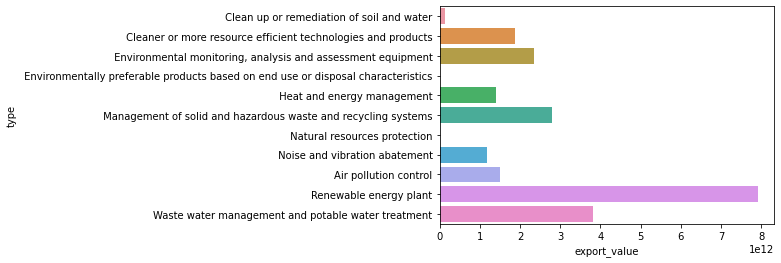

In [167]:
sns.barplot(data=grouped,y="type", x="export_value")